-------------------------------------------------------------------------------------------------------------------------------
I will be using Roboflow to implement this project. Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. You can visit my Roboflow page to see the results of this project.  

## Step 1: Creating the Project
Before I start, I created a Roboflow account. Once I did that, I created a new project in the Roboflow dashboard. The project type is "Object Detection". The class I will be detecting is 'emptySpaces and the project name is "Empty Spaces Detection in Shelf Data".

![title](ShelfSight/images/s1.png)

## Step 2: Uploading images
Next, I added the data to my newly created project. I drag and drop'd my directory /data , which contains all the images in .jpg format. There are total 412 images for the dataset of shelves. The dataset not only contains pictures from different supermarkets in a place, but also different countries so it is really diverse. Roboflow dashboard automatically processed and uploaded the images and the next step is annotations.
<br>Link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/8RET7B

![title](ShelfSight/images/s2-1.png)

![title](ShelfSight/images/s2-2.png)

![title](ShelfSight/images/s2-3.png)

![title](ShelfSight/images/s2-4.png)

Samples:

![title](ShelfSight/data/19ed9869-a3ad-4d78-b23e-a495c8c73da9_jpg.rf.7cf96f24e9ec916d0bb47e3743d6e87b.jpg)

![title](ShelfSight/data/13718415-4874-4c9d-a81b-6f9ba461bd29_jpg.rf.a93fb73a273b8c0a995df3f70a39c8e5.jpg)

## Step 3: Labeling
I labelled the uploaded images in Roboflow Annotate. There were total 421 images, out of which I decided to annotate 300 because annotating is a tideous process. I labelled about 2 images per minute. Here are some annotations of the sample I provided earlier.

![title](ShelfSight/images/s3-1.png)

![title](ShelfSight/images/s3-4.png)

I firstly annoted 30 images seperately, so I annoted the rest 270 images here, while ignoring the unannotated ones. And, added it into my dataset of 300 images.

![title](ShelfSight/images/s3-2.png)

## Step 4: Generate new dataset version
Now that I have the images and annotations added, I generated a new dataset version. I used train-test split, by splitting 70% training, 20% validation and 10% testing. When generating a new version of data, you can elect to add preprocessing and augmentations. This step is completely optional, however, it can allow to significantly improve the robustness of the model.

![title](ShelfSight/images/s4-1.png)

The preprocessing includes Resize, which downsizes the image for smaller file sizes and faster training. Auto-Orient discards any orientated images. The augmentation is a crucial process. It helps us create more images of the same dataset by generating augmented version of each images. Firstly, I used 90 Rotate, which adds 90-degree rotations to help the model be insensitive to camera orientations because a picture can be taken vertically and horizontally. And, Exposure includes adding variability to image brightness to help the model be more resilient to lighting and camera settings, because a good quality image isn't always available.

![title](ShelfSight/images/s4-2.png)

![title](ShelfSight/images/s4-4.png)

![title](ShelfSight/images/s4-3.png)

Through the augmentation steps, we are able to convert 300 images into 720 (there were more but they can only be used with a purchase of subscription).

![title](ShelfSight/images/s3-3.png)

![title](ShelfSight/images/s5-2.png)

## Step 5: Exporting dataset
Once the dataset version is generated, I clicked Export and select the YOLO v5 PyTorch dataset format.

![title](ShelfSight/images/s5-1.png)

![title](ShelfSight/images/s5-3.png)

![title](ShelfSight/images/s5-4.png)

![title](ShelfSight/images/s5-5.png)

## Step 6: Loading the custom dataset and labels



The rest of the code is run in colab, because their free GPUs (type T4)

In [1]:
!nvidia-smi

Fri Jul 21 11:25:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install ultralytics==8.0.20
!pip install roboflow --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [4]:
import os
HOME = os.getcwd()

!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="8B5TfIVBUCxvAsWWsNqX")
project = rf.workspace("dsjourney").project("empty-spaces-detection-in-shelf-data")
dataset = project.version(2).download("yolov5")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Empty-Spaces-Detection-in-Shelf-Data-2 in yolov5pytorch:: 100%|██████████| 1450/1450 [00:00<00:00, 1658.49it/s]


## Step 7: Training the YOLO model

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 71.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Empty-Spaces-Detection-in-Shelf-Data-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

## Step 8: Tables and Graphs

As you can see from the result of our training cell, we get a recall of 0.525 and precision of 0.675. Here are some images of the confusion matrix, F1 curve, Percision Curve, Recall Curve and some other results producted by the model.

/content


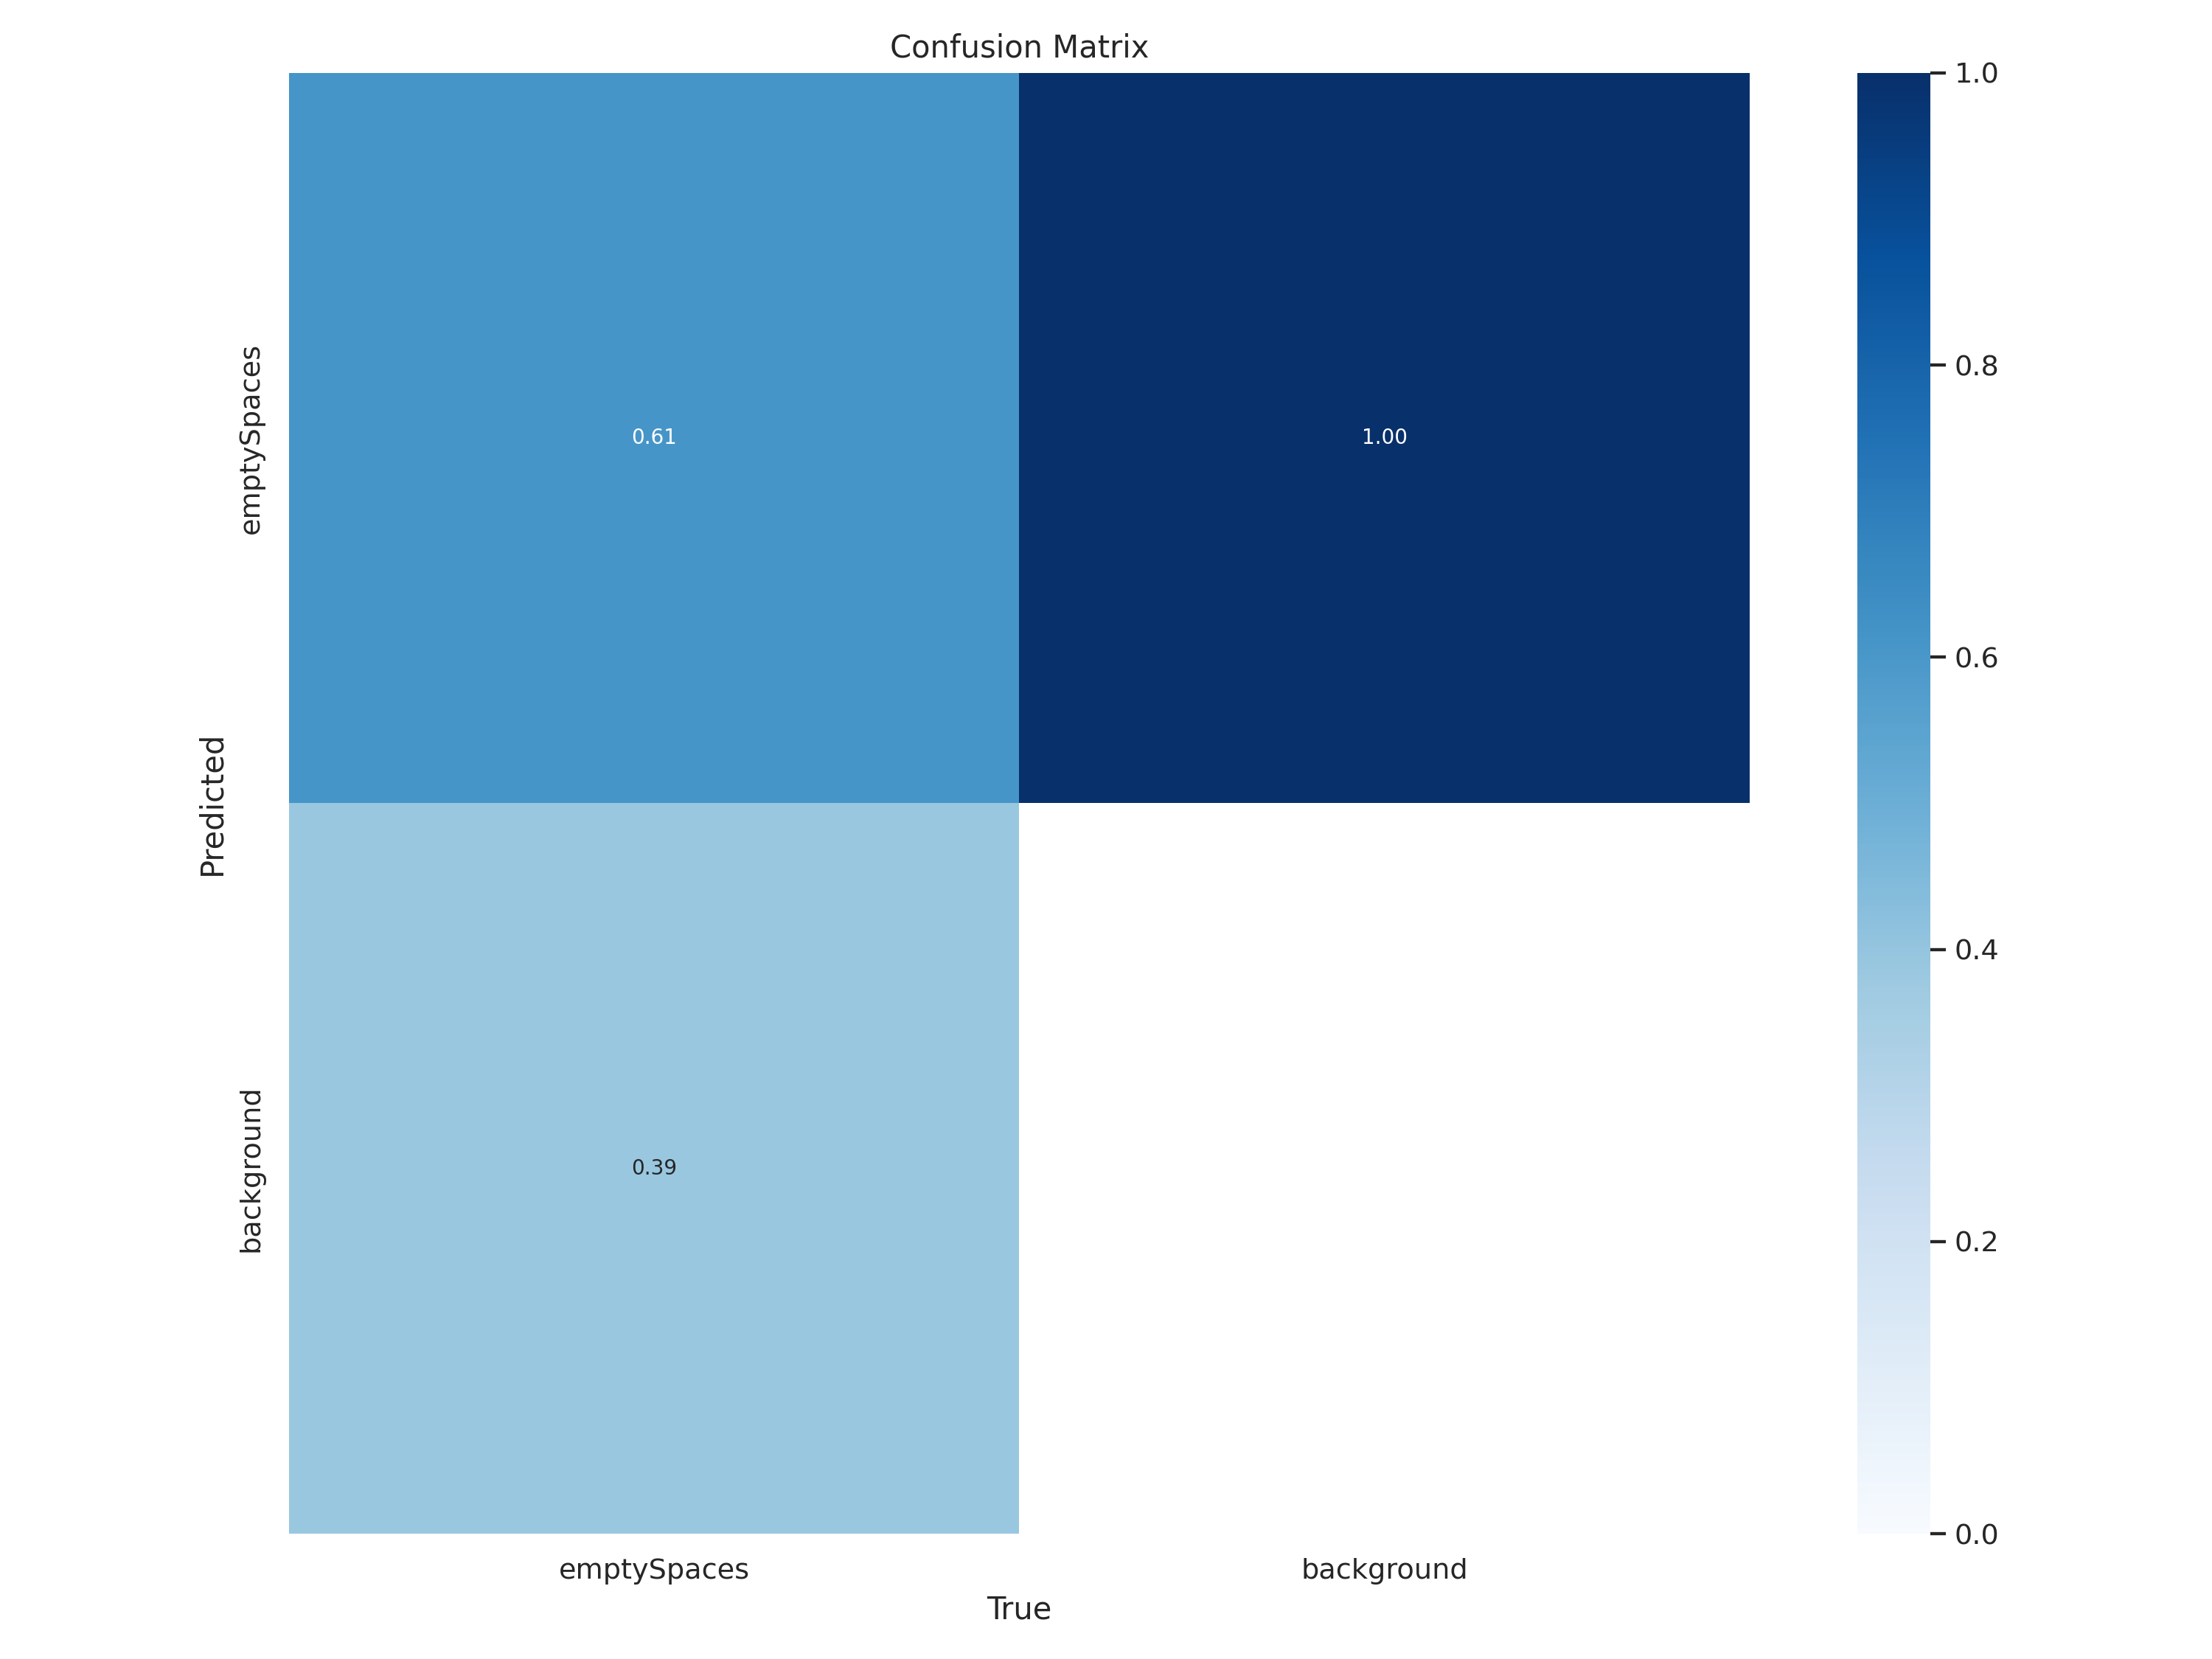

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


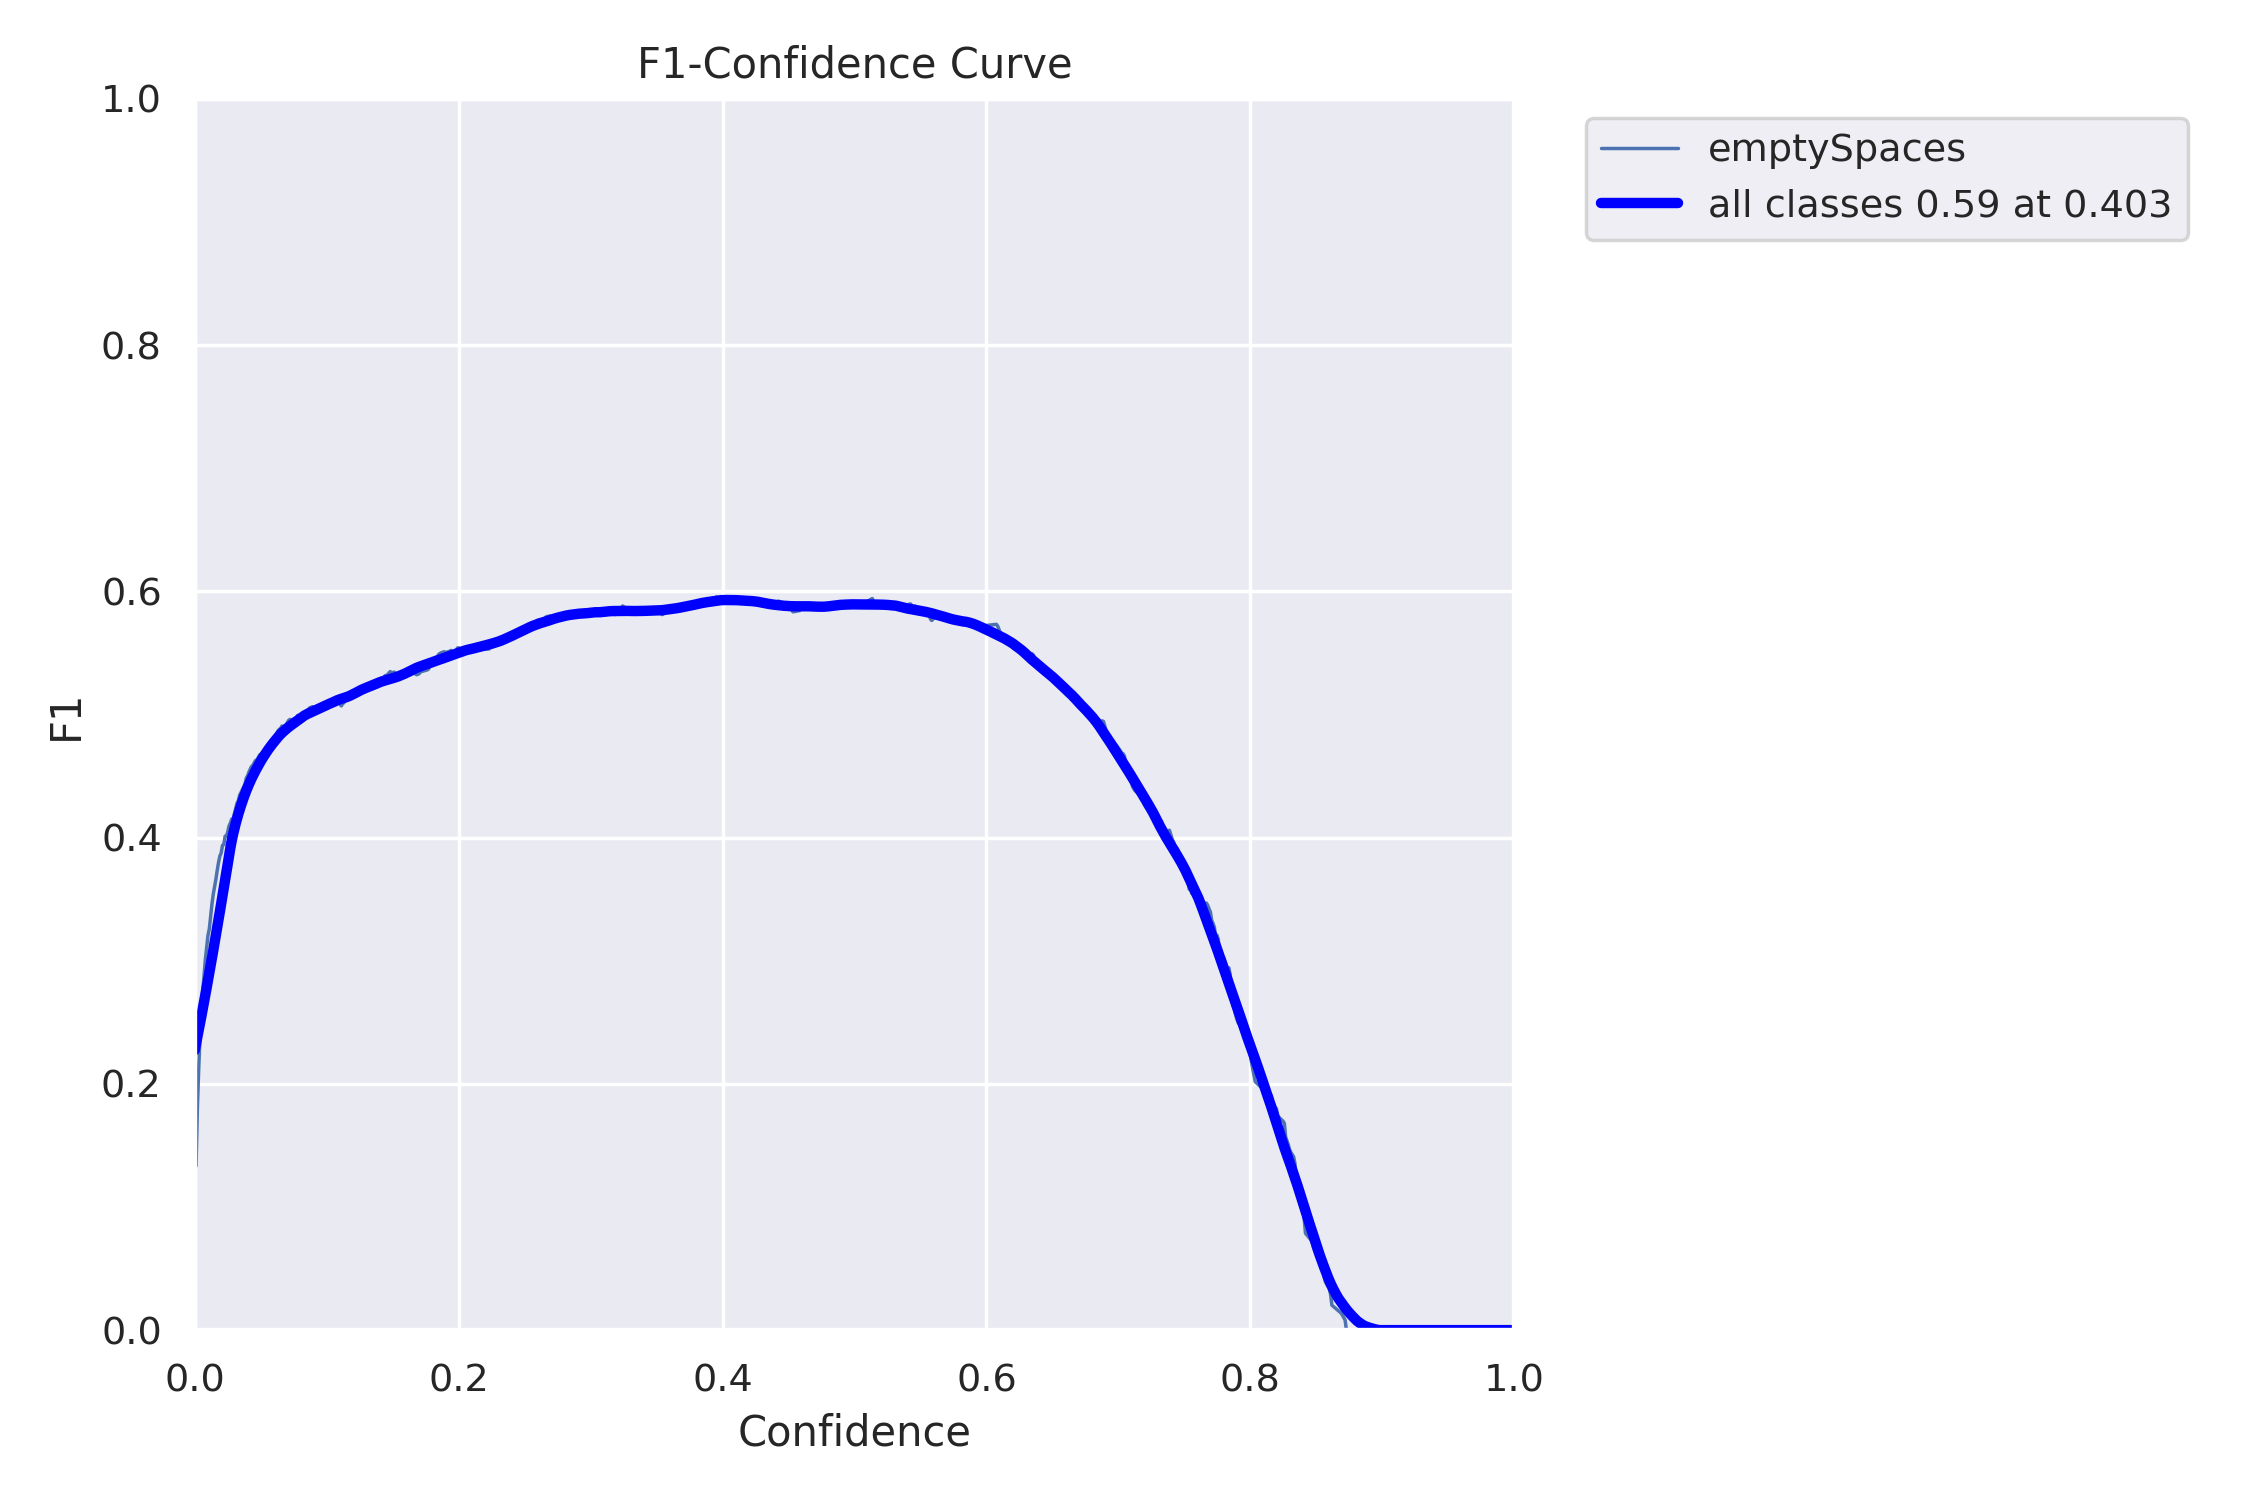

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=1000)

/content


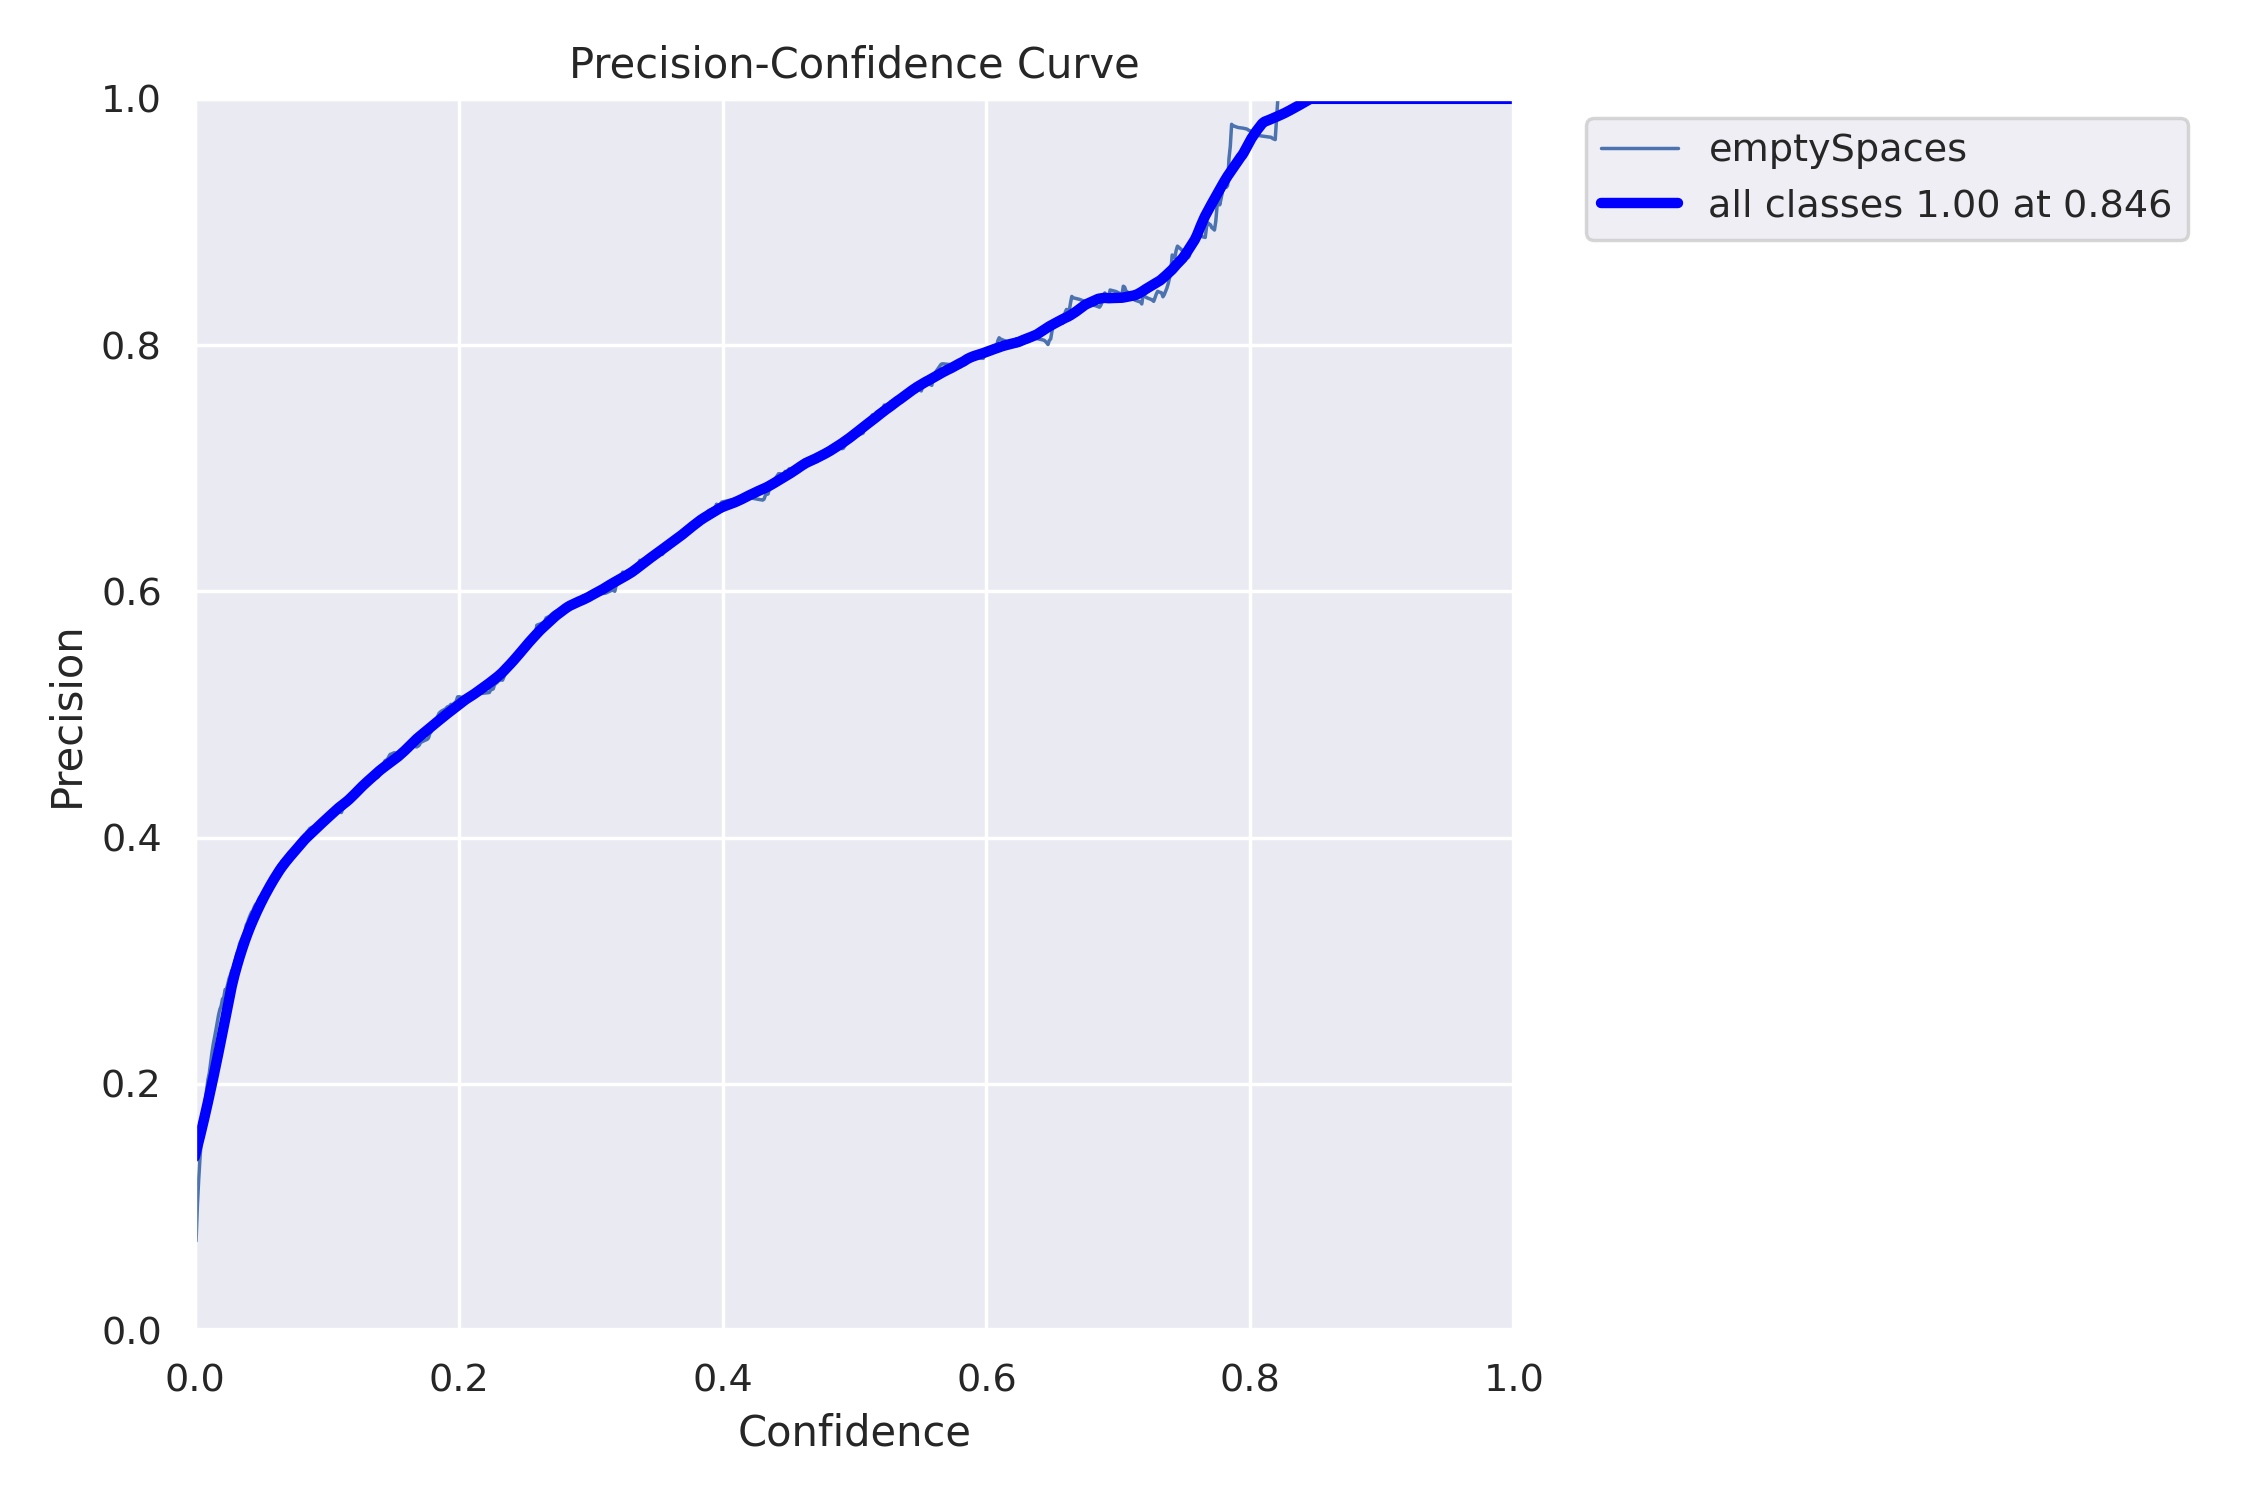

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=1000)

/content


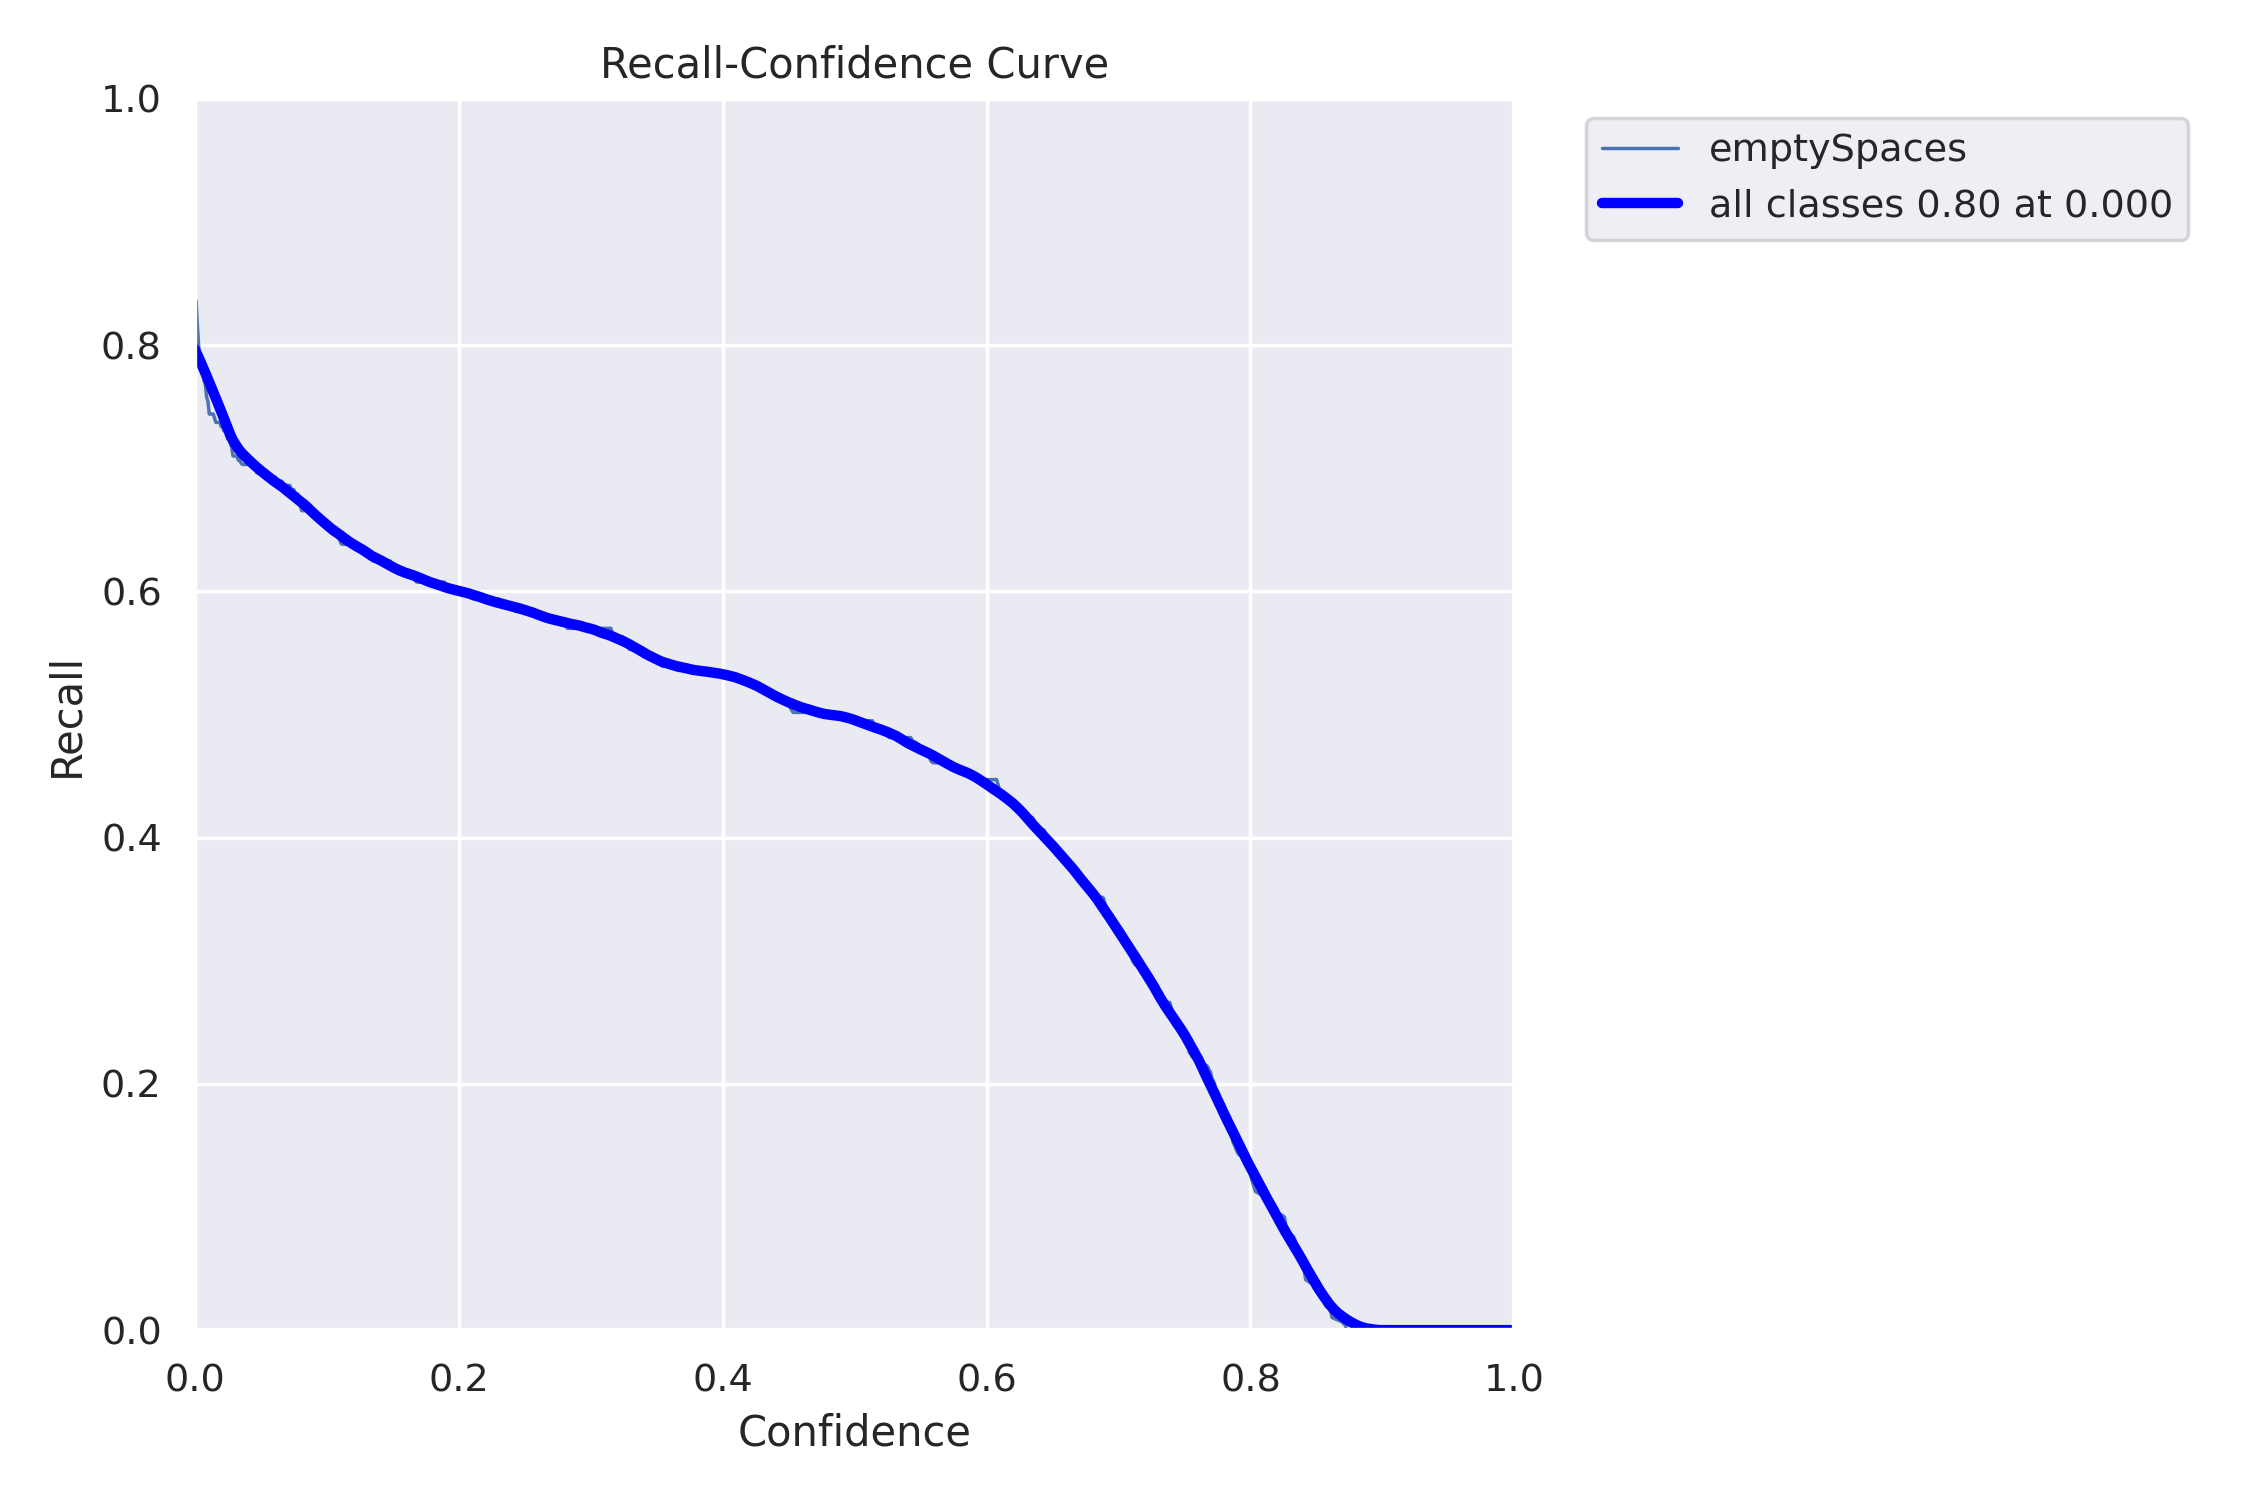

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=1000)

/content


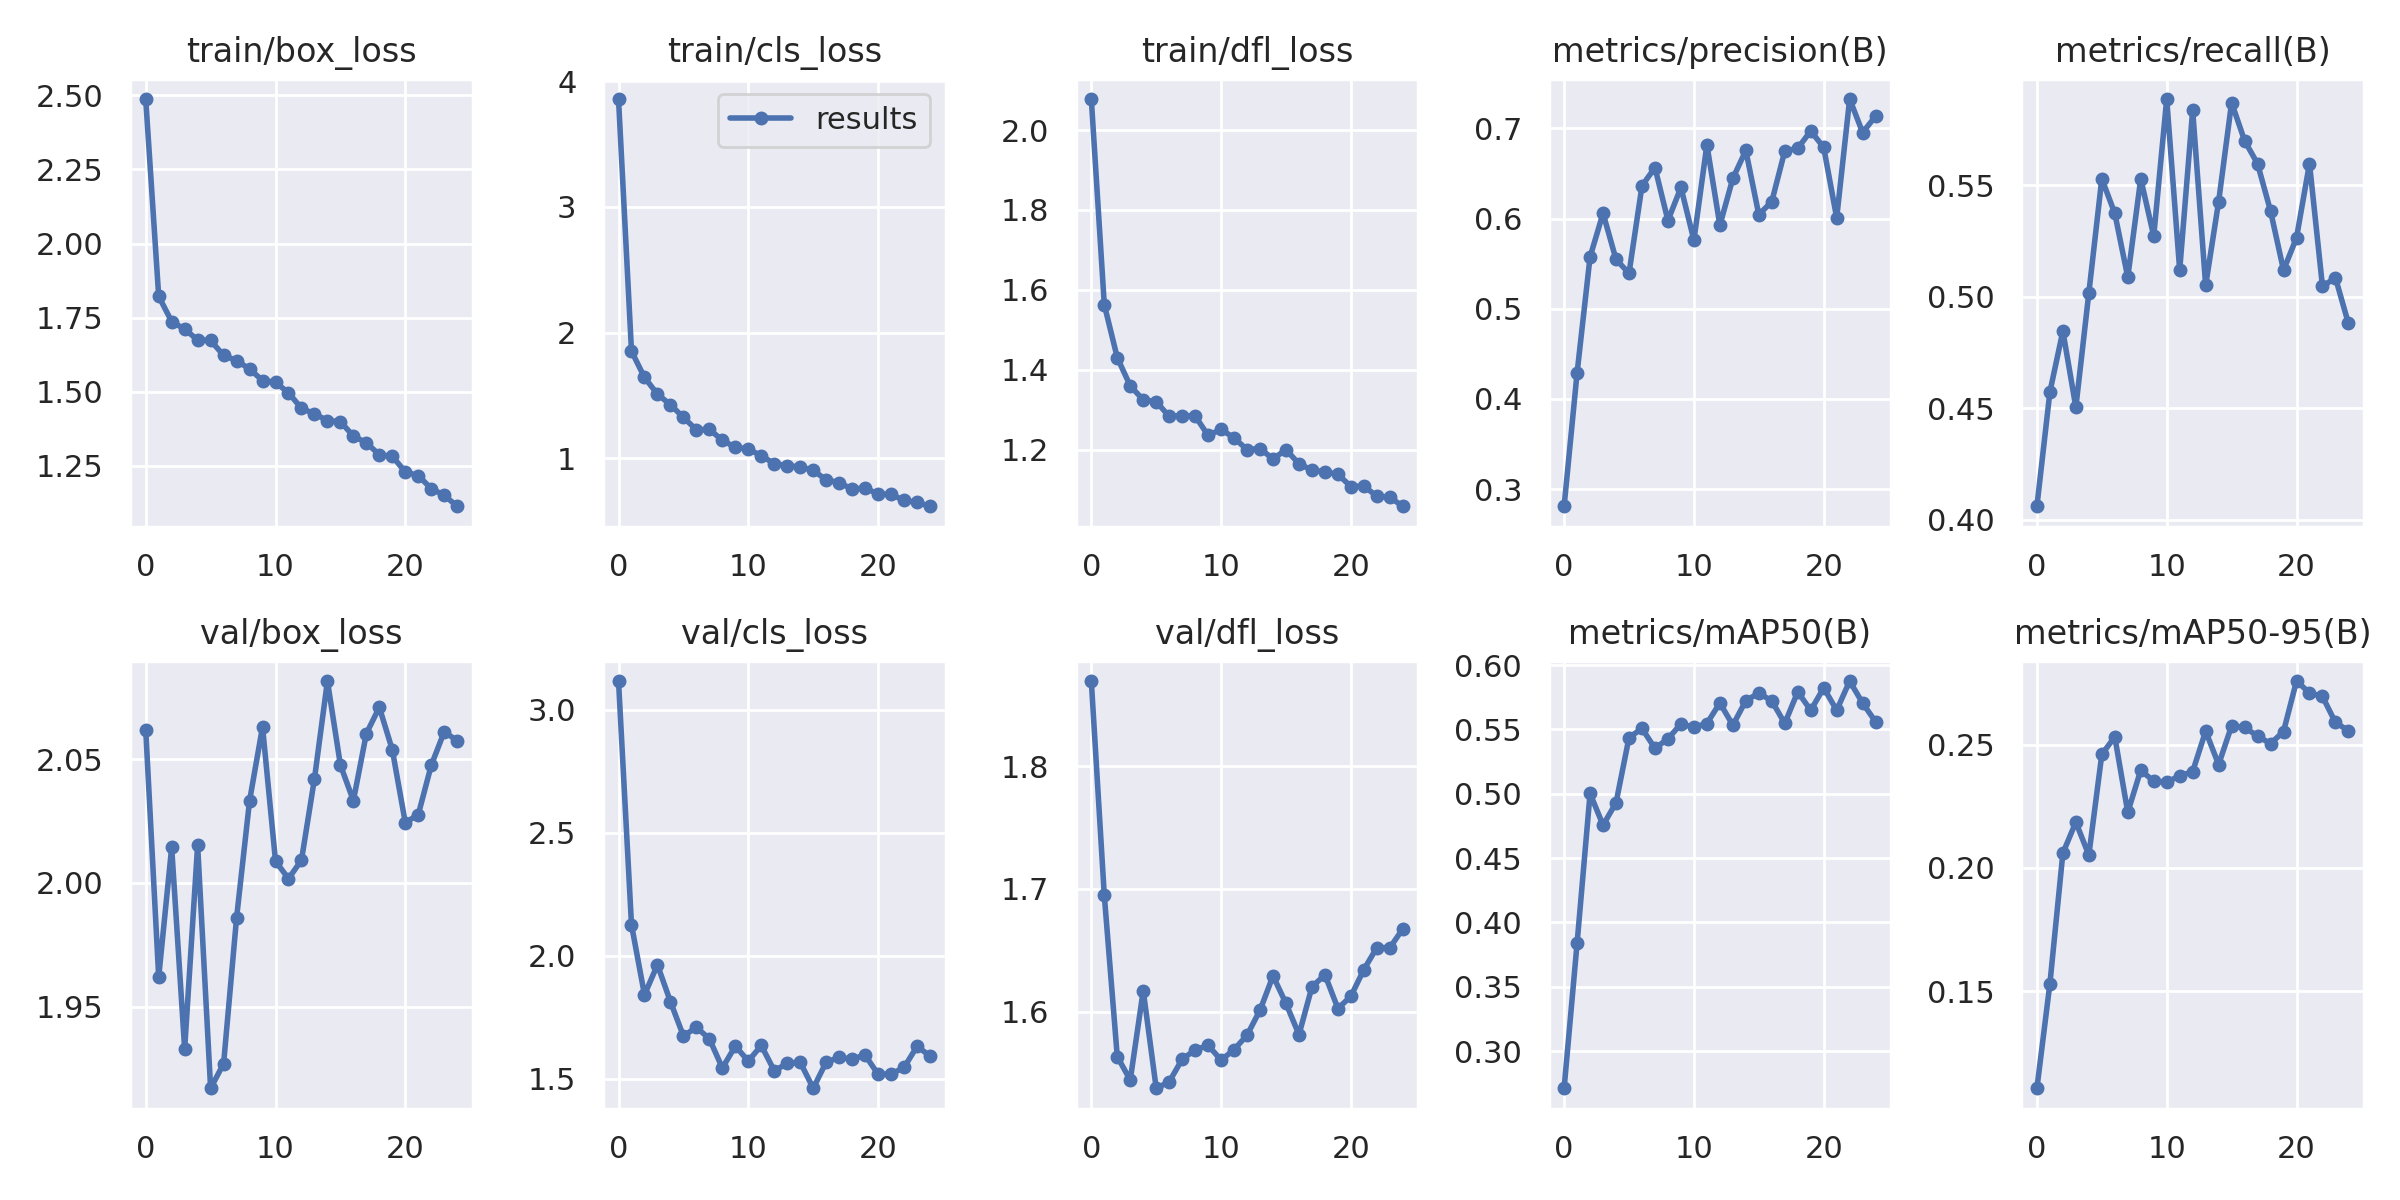

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

## Step 9: Inference with Custom Model
In this final step, we will test our model on the testing data to see how well does it identify empty spaces in shelves.

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-21 11:54:28.195482: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 11:54:29.091344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/30 /content/datasets/Empty-Spaces-Detection-in-Shelf-Data-2/test/images/0e09c4a1-cbee-4c54-9b63-cf7e15ba790c_jpg.rf.612dffc03f6ec9edbc1d6b1b795fc844.jpg: 800x800 5 emptySpacess, 24.6ms
image 2/30 /content/datasets/Empty-Spaces-Detection-in-Shelf-Data-2/test/images/0fcb6387-fa50-4cb8-ae85-7b9dff316cfc_jpg.rf.e59967dfb2f1f439bf59b61d567f2f76.jpg: 800x800 5 emptySpacess, 24.6ms
im

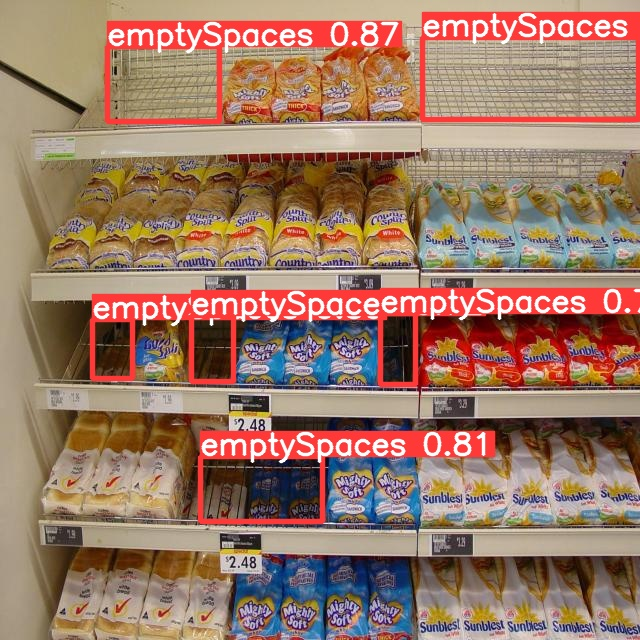

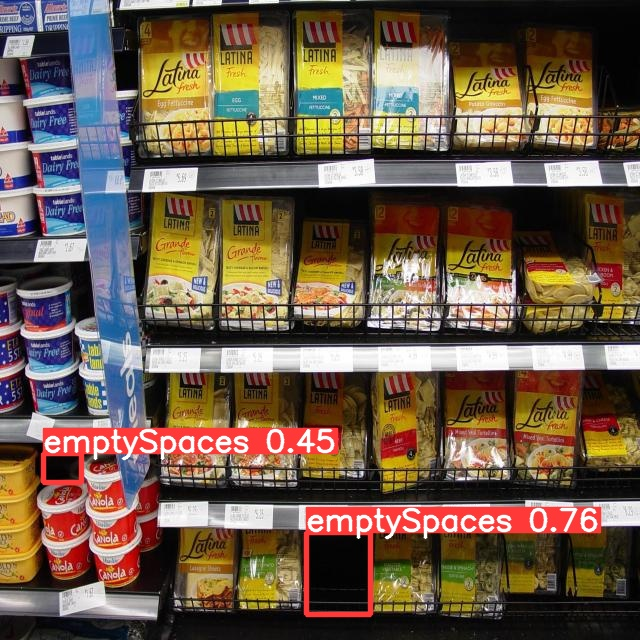

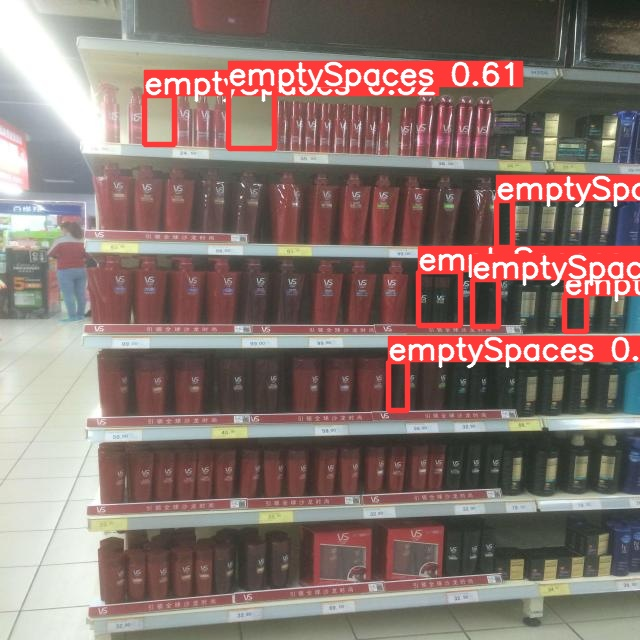

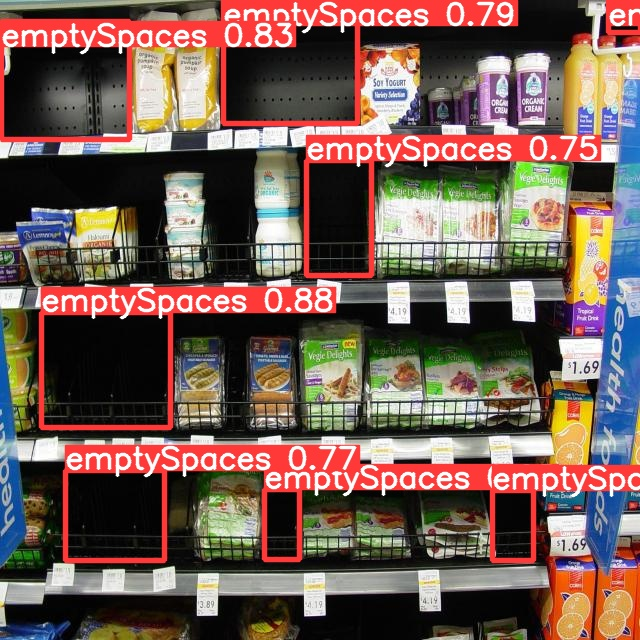

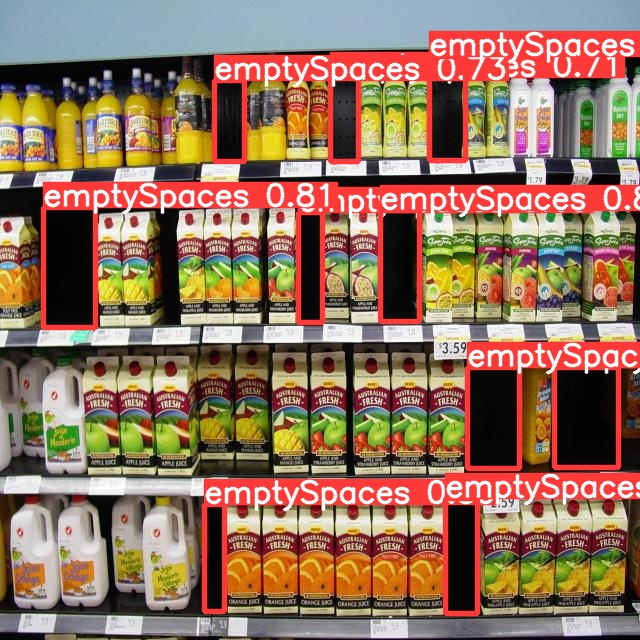

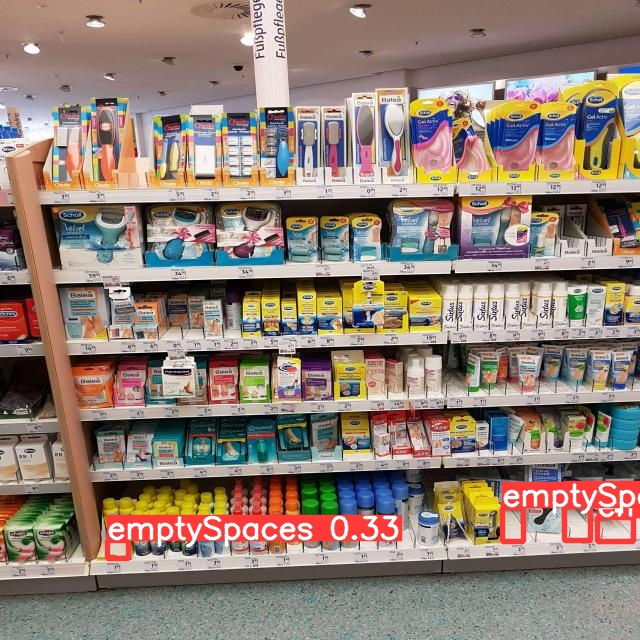

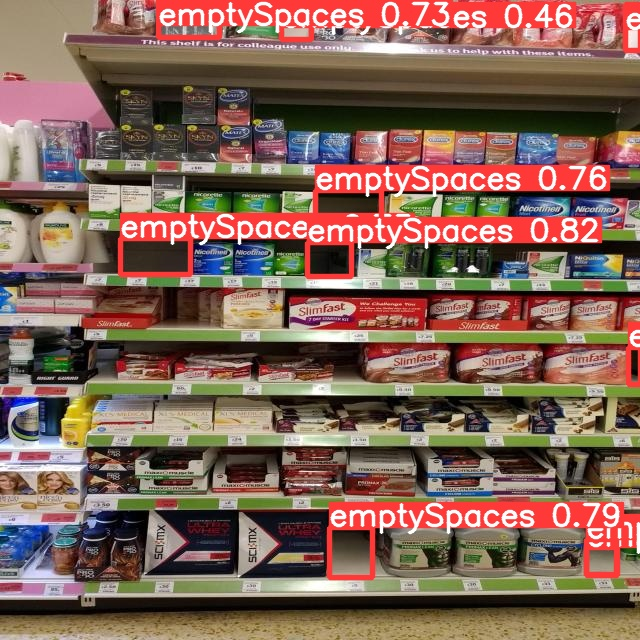

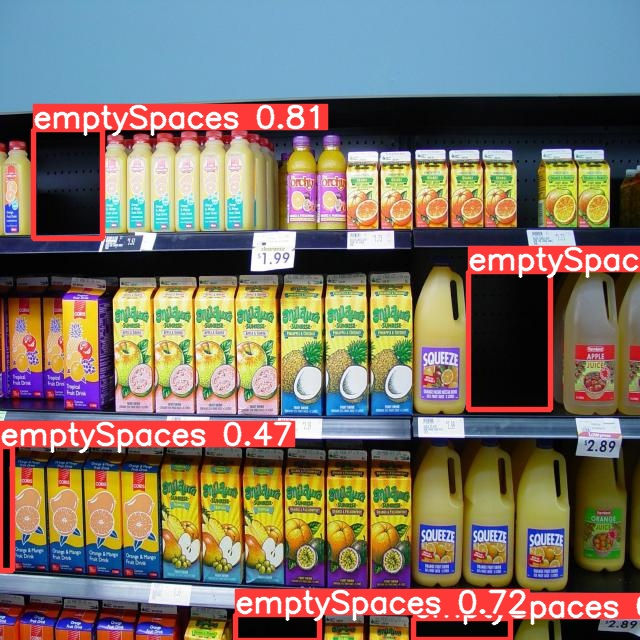

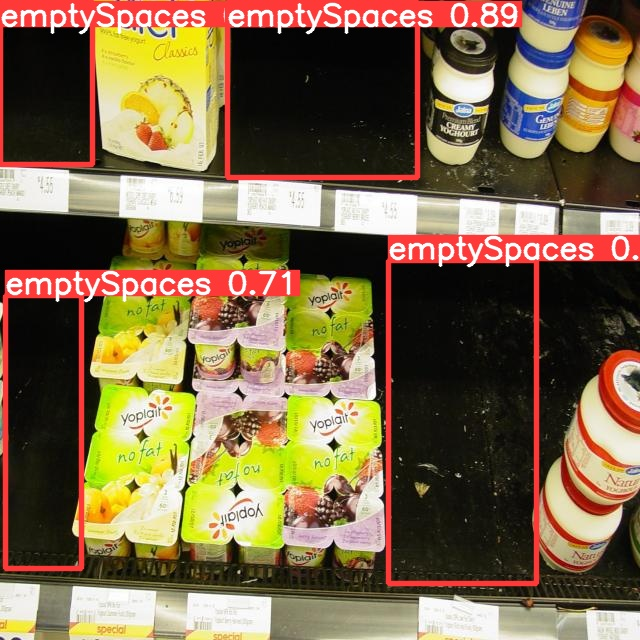

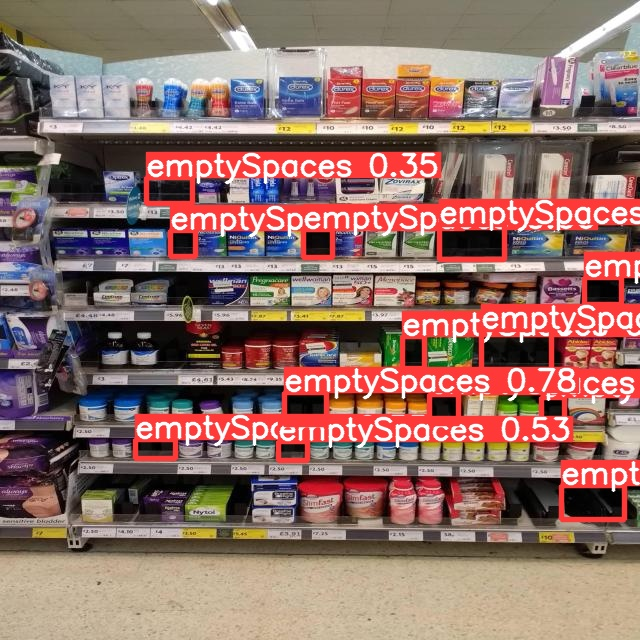

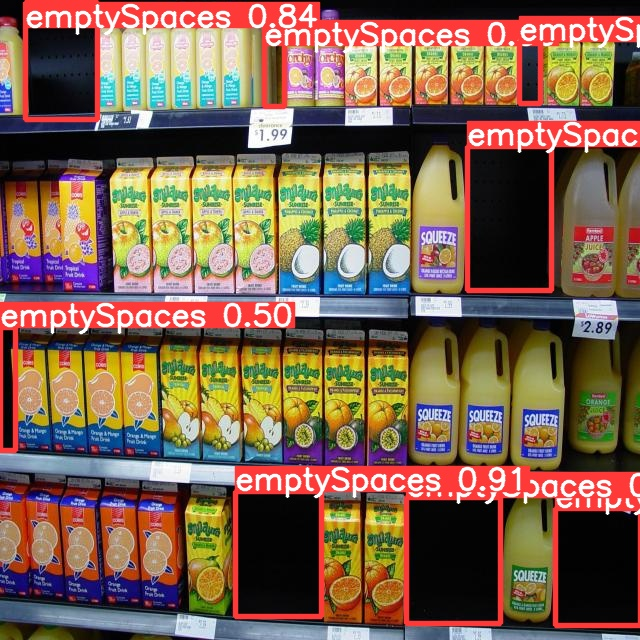

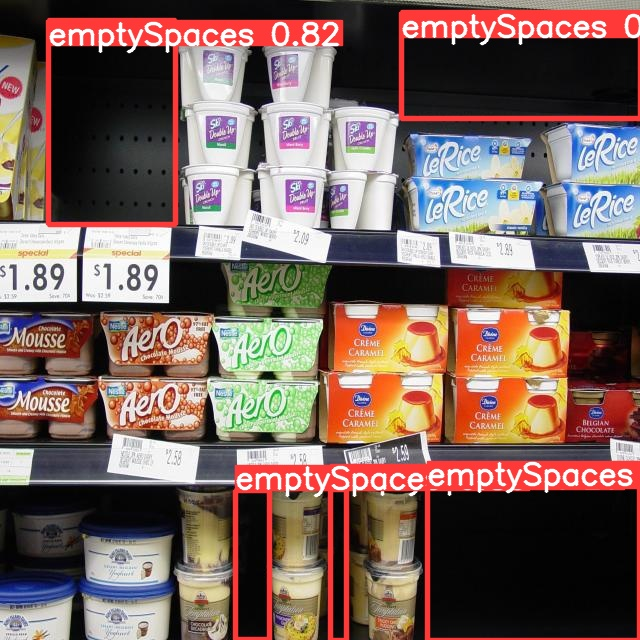

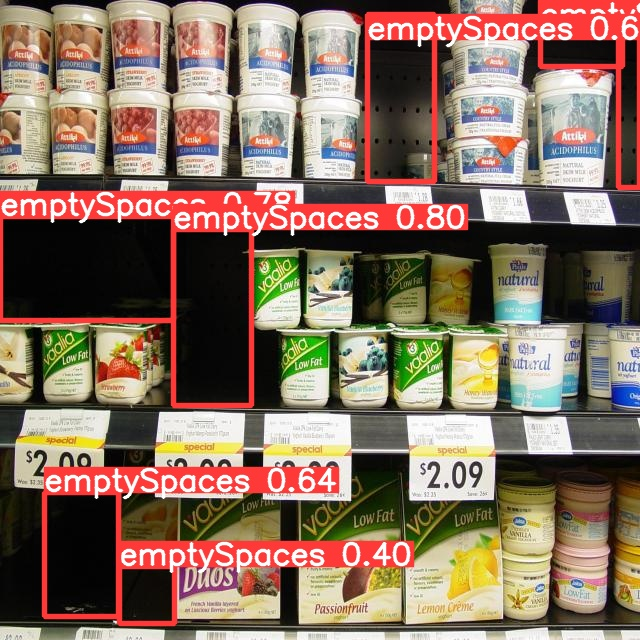

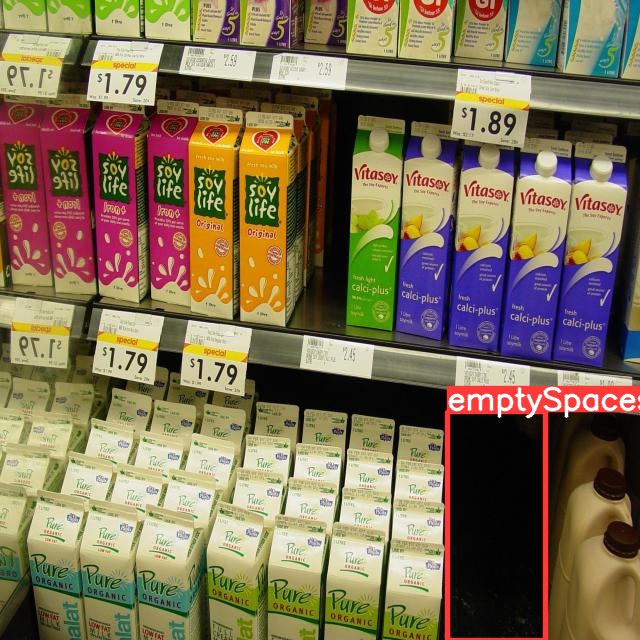

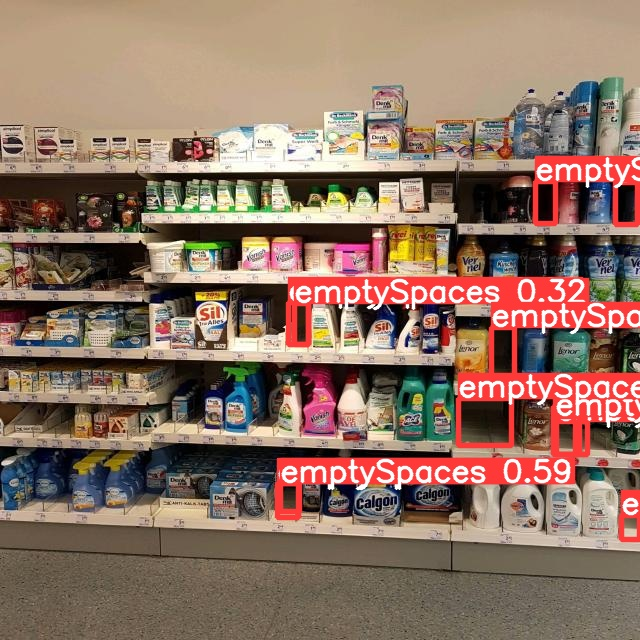

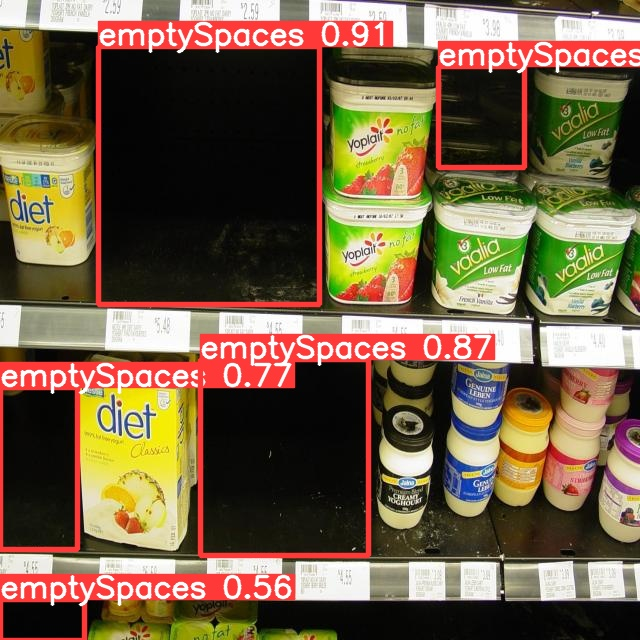

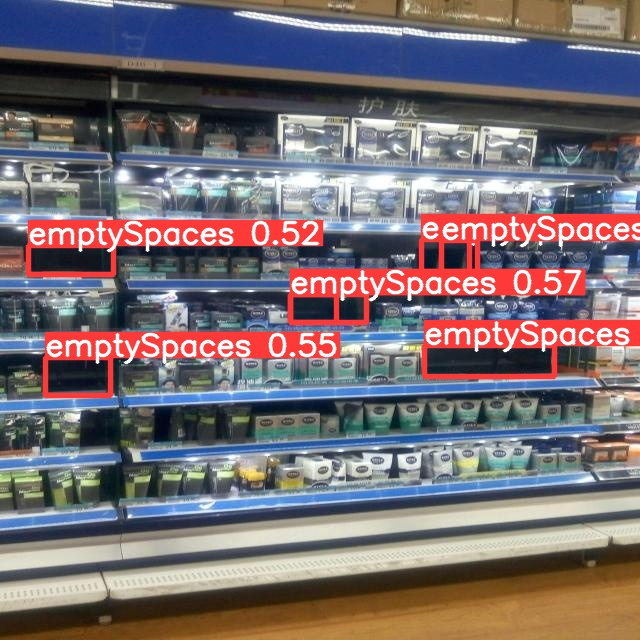

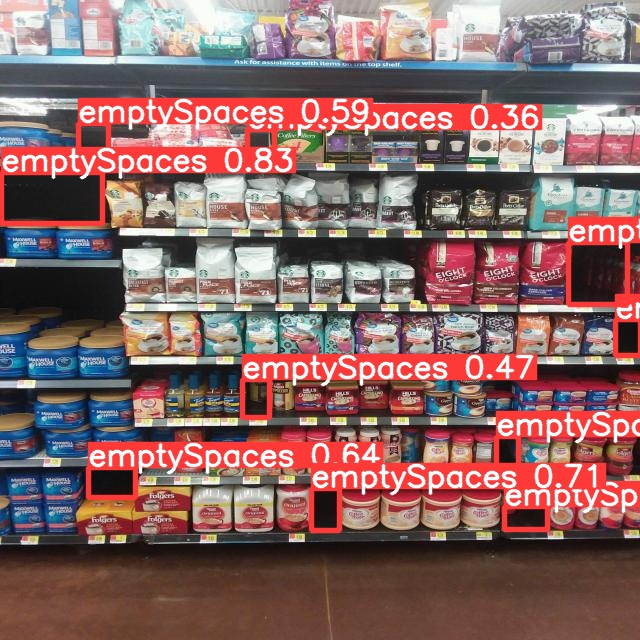

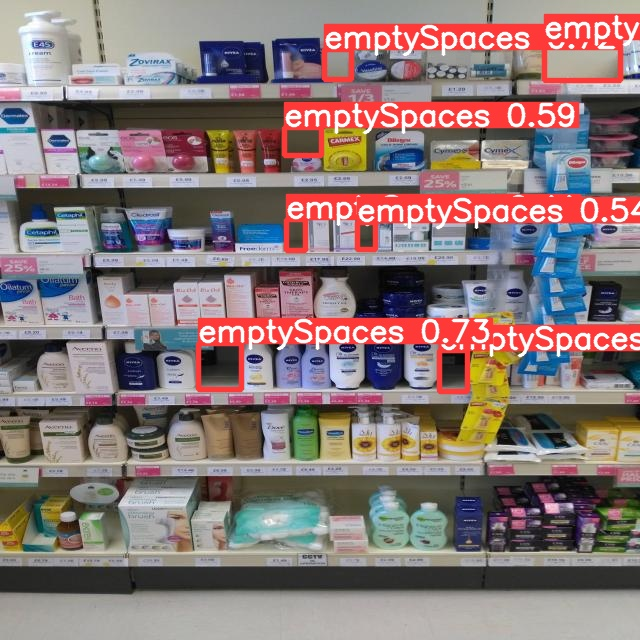

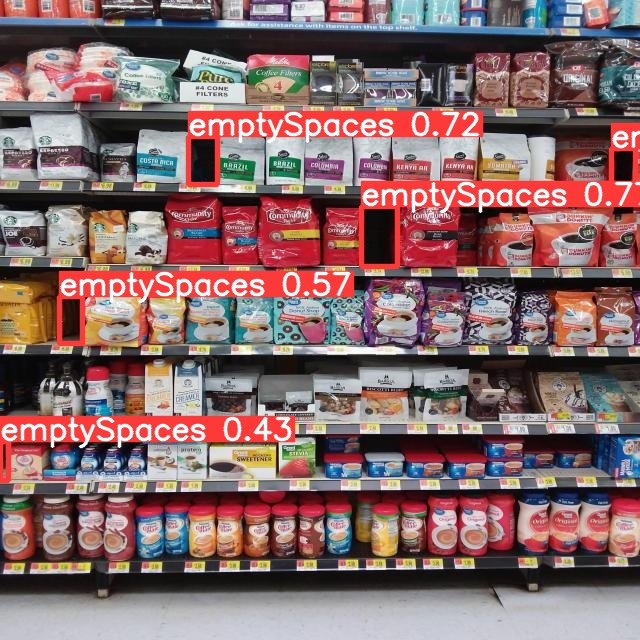

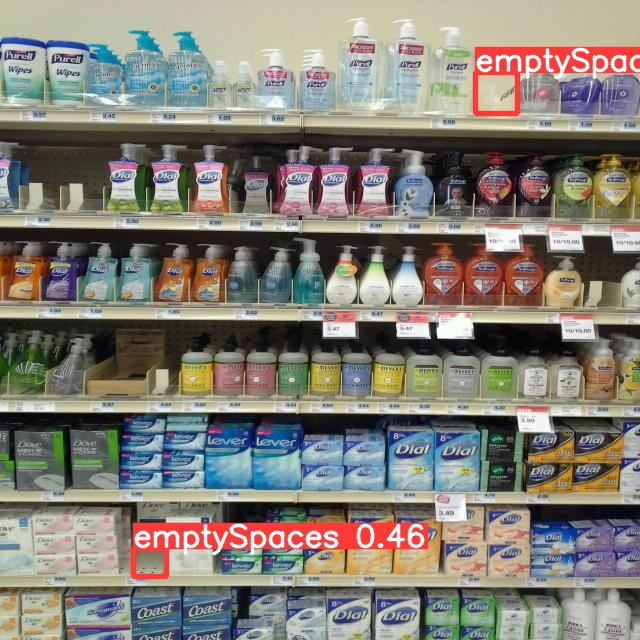

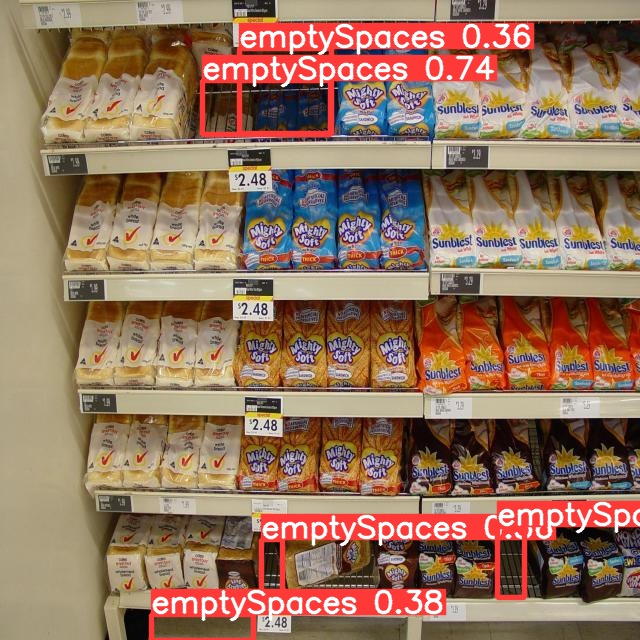

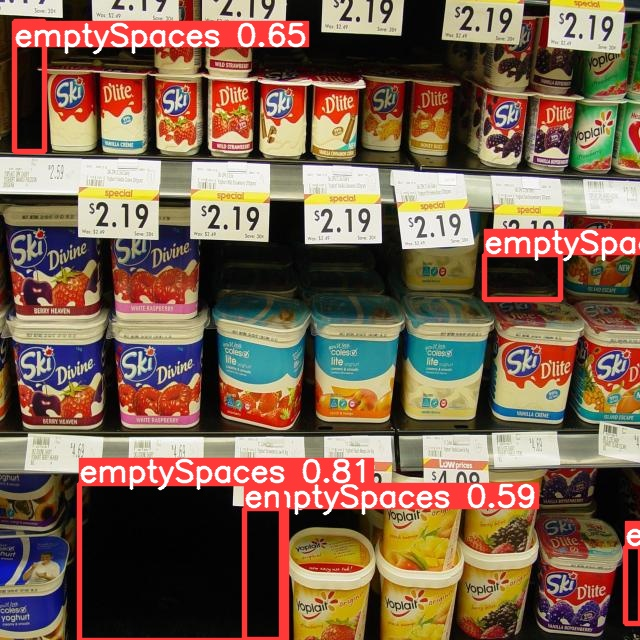

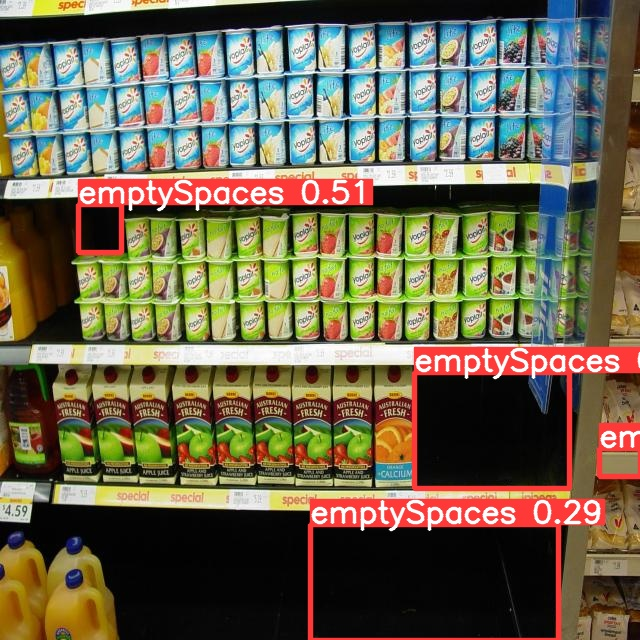

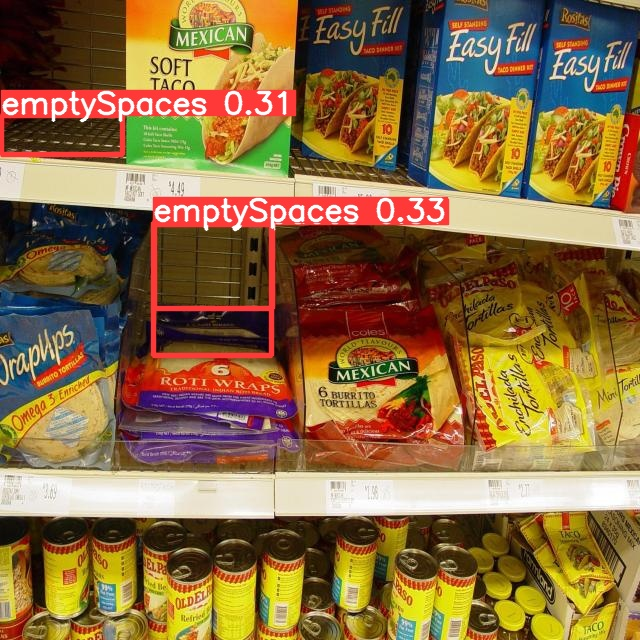

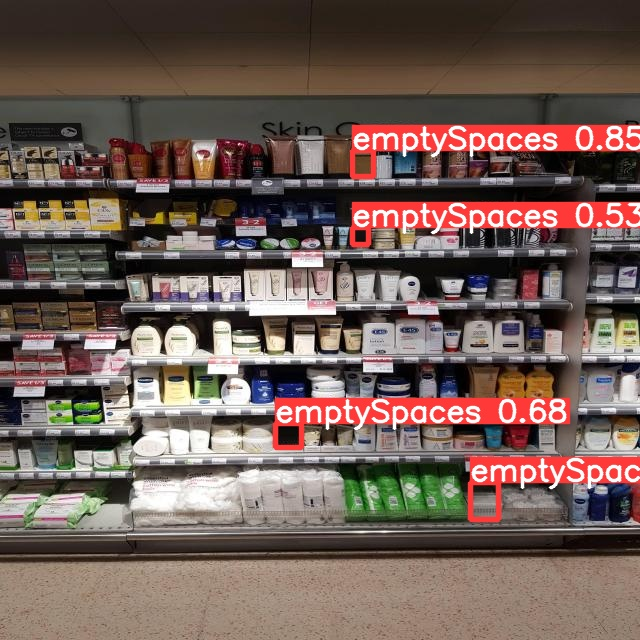

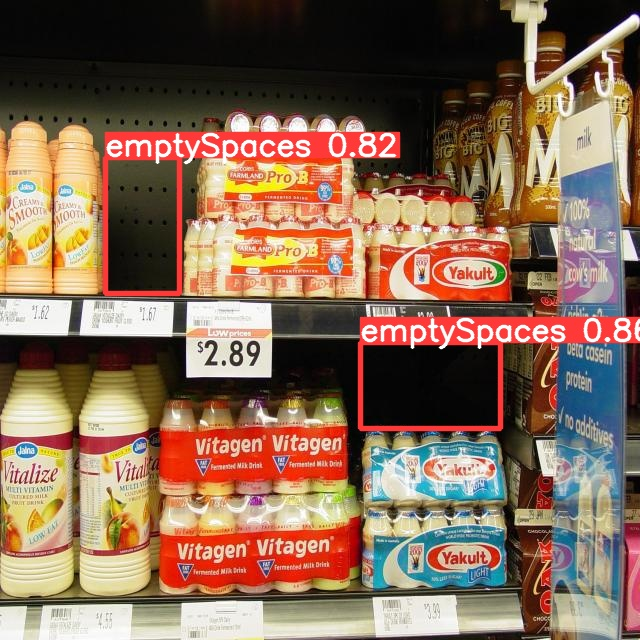

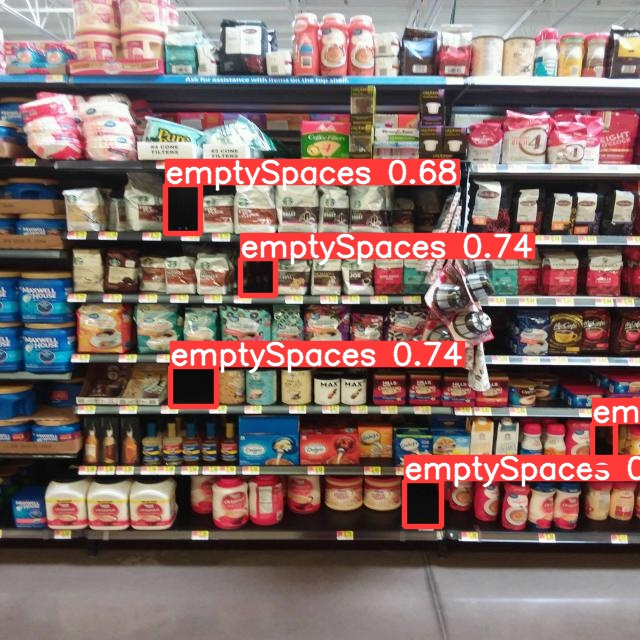

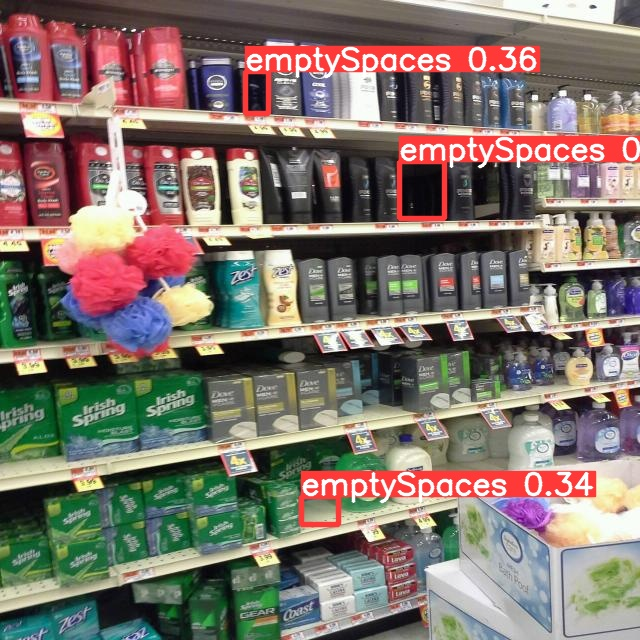

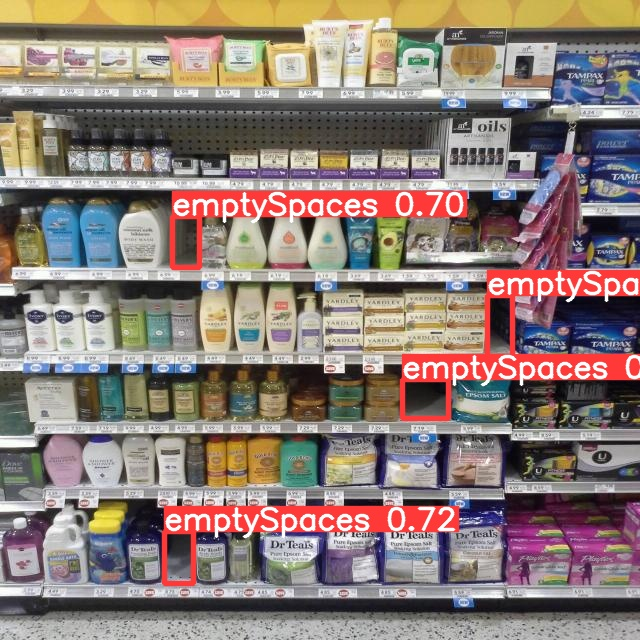

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")